In [1]:
import numpy as np
import pandas as pd

from sktime.forecasting.neuralforecast import NeuralForecastRNN
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
# from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
# warnings.simplefilter('ignore', category=ValueWarning)
# warnings.simplefilter('ignore', category=ConvergenceWarning)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

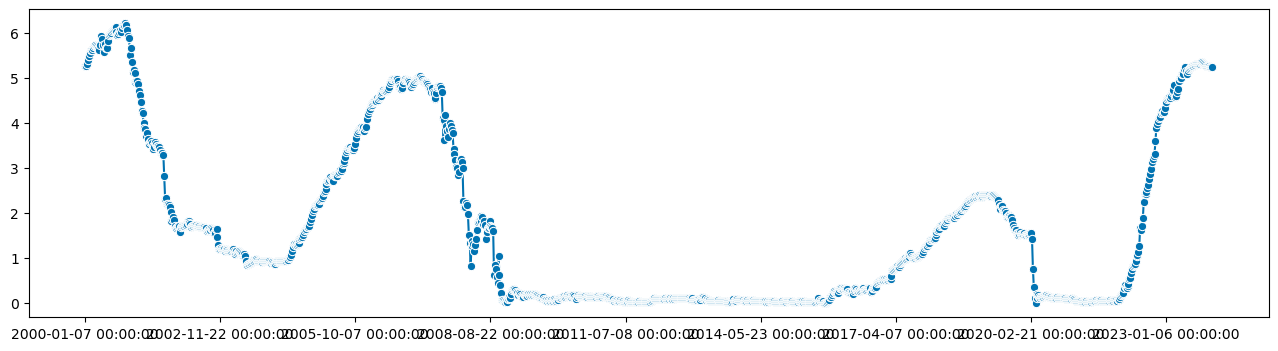

In [2]:
y = web.DataReader(name='WTB3MS', data_source='fred', start='2000-01-01', end='2023-12-31')
plot_series(y)

In [10]:
y_train, y_test = temporal_train_test_split(y, train_size=0.8)

In [11]:
model = NeuralForecastRNN("W-Fri", max_steps=5)

model.fit(y_train, fh=y_test.index)

Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

NeuralForecastRNN(freq='W-Fri', max_steps=5)

In [12]:
y_pred= model.predict(fh=y_test.index)

Predicting: 0it [00:00, ?it/s]

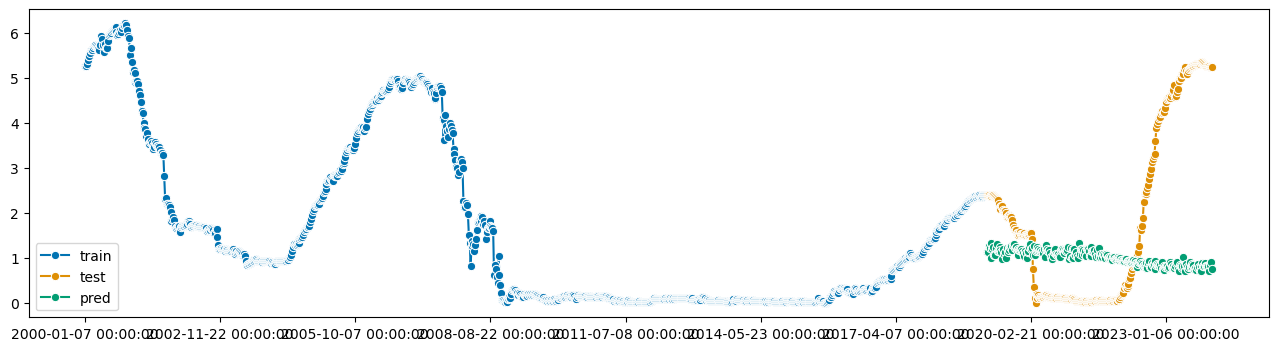

In [13]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])

plt.show()